# Merge the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
df = pd.read_csv('../data/curated/domain.csv').drop_duplicates()
shop = pd.read_csv('../data/raw/merge_requirement/Driving_shop.csv').drop_duplicates()
park = pd.read_csv('../data/raw/merge_requirement/Direct_park.csv').drop_duplicates()
train = pd.read_csv('../data/raw/merge_requirement/Direct_train.csv').drop_duplicates()
hosp = pd.read_csv('../data/raw/merge_requirement/Driving_hospital.csv').drop_duplicates()
school = pd.read_csv('../data/raw/merge_requirement/Direct_school.csv').drop_duplicates()

income = pd.read_csv('../data/curated/train/income_data/income_data_2019.csv')
population = pd.read_csv('../data/curated/train/population_data/population_data_2021.csv')
crime = pd.read_csv('../data/curated/train/crime_data/crime_data_2023.csv')

income = income[['SA2', 'avg_income']].drop_duplicates()
population = population[['SA2', 'avg_population']].drop_duplicates()
crime = crime[['SA2', 'avg_crime']].drop_duplicates()

merge_columns = ['name', 'cost_text', 'rooms', 'parking', 'coordinates', 'desc', 'price', 'postcode']

merged_df = pd.merge(df, shop[['name', 'NearestShoppingDistance']], on='name', how='inner')
merged_df = pd.merge(merged_df, park[['name', 'NearestParkDistance']], on='name', how='inner')
merged_df = pd.merge(merged_df, train[['name', 'NearestTrainDistance']], on='name', how='inner')
merged_df = pd.merge(merged_df, hosp[['name', 'NearestHospitalDistance']], on='name', how='inner')
merged_df = pd.merge(merged_df, school[['name', 'NearestSchoolDistance']], on='name', how='inner')

merged_df = pd.merge(merged_df, income, on='SA2', how='left')
merged_df = pd.merge(merged_df, population, on='SA2', how='left')
merged_df = pd.merge(merged_df, crime, on='SA2', how='left')


merged_df = merged_df.drop_duplicates()
merged_df.to_csv('../data/curated/merged_data.csv', index=False)
merged_df.count()


name                       8870
coordinates                8870
price                      8870
bed                        8870
bath                       8870
park_num                   8870
postcode                   8870
Latitude                   8870
Longitude                  8870
SA2                        8870
NearestShoppingDistance    8870
NearestParkDistance        8870
NearestTrainDistance       8870
NearestHospitalDistance    8870
NearestSchoolDistance      8870
avg_income                 8870
avg_population             8870
avg_crime                  8870
dtype: int64

In [6]:
mean_income = income['avg_income'].mean()
mean_population = population['avg_population'].mean()

merged_df['avg_income'].fillna(mean_income, inplace=True)
merged_df['avg_population'].fillna(mean_population, inplace=True)
merged_df['avg_crime'].fillna(0, inplace=True)

merged_df.head()

,name,coordinates,price,bed,bath,park_num,postcode,Latitude,Longitude,SA2,NearestShoppingDistance,NearestParkDistance,NearestTrainDistance,NearestHospitalDistance,NearestSchoolDistance,avg_income,avg_population,avg_crime
0,2010/7 Katherine Place Melbourne VIC 3000,"[-37.8201858, 144.9564628]",675.0,2.0,2.0,0,3000,-37.820186,144.956463,206041122,0.8348,23.721104,0.511321,2.4083,0.405612,47378.47006,62833.3125,184.036145
1,1308/68 La Trobe Street Melbourne VIC 3000,"[-37.8083648, 144.9667899]",570.0,2.0,1.0,1,3000,-37.808365,144.966790,206041122,0.6065,22.385016,0.405031,0.8112,0.483248,47378.47006,62833.3125,184.036145
2,1307/268 Flinders Street Melbourne VIC 3000,"[-37.8178134, 144.9655688]",400.0,1.0,1.0,0,3000,-37.817813,144.965569,206041122,0.4869,22.883839,0.136626,2.2292,0.822473,47378.47006,62833.3125,184.036145
3,407/62-68 Hayward Lane Melbourne VIC 3000,"[-37.8089779, 144.9668783]",350.0,0.0,1.0,0,3000,-37.808978,144.966878,206041122,0.4840,22.402529,0.388900,0.9589,0.430259,47378.47006,62833.3125,184.036145
4,403/39 Queen Street Melbourne VIC 3000,"[-37.817888, 144.9617372]",450.0,0.0,1.0,0,3000,-37.817888,144.961737,206041122,0.9232,23.195429,0.463733,2.2483,0.512263,47378.47006,62833.3125,184.036145


## Use the Specific Features do some Correlation Analysis

In [7]:
# Select the columns you want to include in the correlation heatmap
columns_to_include = ['name', 'price', 'bed', 'bath', 'park_num', 'NearestShoppingDistance',
                      'NearestParkDistance', 'NearestTrainDistance', 'NearestHospitalDistance',
                      'NearestSchoolDistance', 'avg_income', 'avg_population', 'avg_crime']

# Create a DataFrame with only the selected columns
selected_merged_df = merged_df[columns_to_include]
selected_merged_df.head()

,name,price,bed,bath,park_num,NearestShoppingDistance,NearestParkDistance,NearestTrainDistance,NearestHospitalDistance,NearestSchoolDistance,avg_income,avg_population,avg_crime
0,2010/7 Katherine Place Melbourne VIC 3000,675.0,2.0,2.0,0,0.8348,23.721104,0.511321,2.4083,0.405612,47378.47006,62833.3125,184.036145
1,1308/68 La Trobe Street Melbourne VIC 3000,570.0,2.0,1.0,1,0.6065,22.385016,0.405031,0.8112,0.483248,47378.47006,62833.3125,184.036145
2,1307/268 Flinders Street Melbourne VIC 3000,400.0,1.0,1.0,0,0.4869,22.883839,0.136626,2.2292,0.822473,47378.47006,62833.3125,184.036145
3,407/62-68 Hayward Lane Melbourne VIC 3000,350.0,0.0,1.0,0,0.4840,22.402529,0.388900,0.9589,0.430259,47378.47006,62833.3125,184.036145
4,403/39 Queen Street Melbourne VIC 3000,450.0,0.0,1.0,0,0.9232,23.195429,0.463733,2.2483,0.512263,47378.47006,62833.3125,184.036145


### Barchart

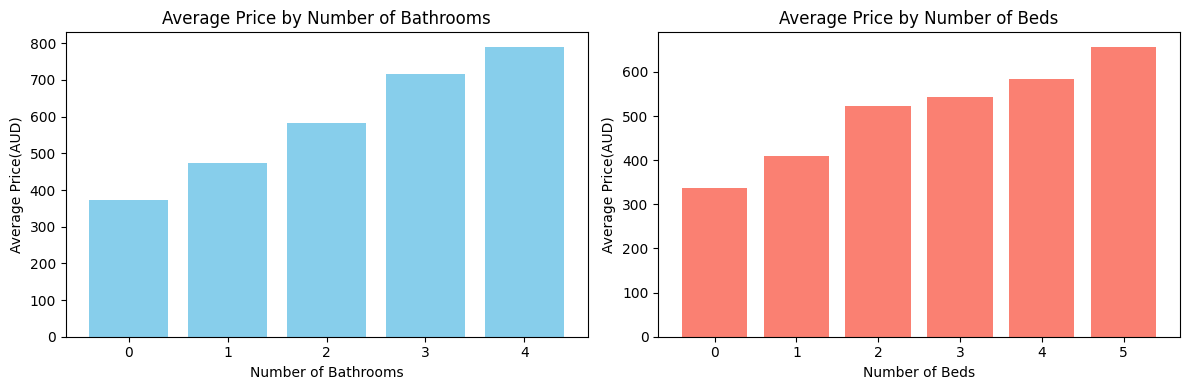

In [8]:
# Calculate the average price for each number of bathrooms
avg_price_by_bath = df.groupby('bath')['price'].mean().reset_index()

# Calculate the average price for each number of bedrooms
avg_price_by_bed = df.groupby('bed')['price'].mean().reset_index()

# Create two subplots for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot barchart for the average price by number of bathrooms
ax1.bar(avg_price_by_bath['bath'], avg_price_by_bath['price'], color='skyblue')
ax1.set_title('Average Price by Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Average Price(AUD)')

# Plot barchart for the average price by number of bedrooms
ax2.bar(avg_price_by_bed['bed'], avg_price_by_bed['price'], color='salmon')
ax2.set_title('Average Price by Number of Beds')
ax2.set_xlabel('Number of Beds')
ax2.set_ylabel('Average Price(AUD)')

# Display the barchart
plt.tight_layout()

# Save the plot to a file
plt.savefig('../plots/Average_Price_by_Number_of_Beds_Baths.png')

plt.show()

### Heatmap

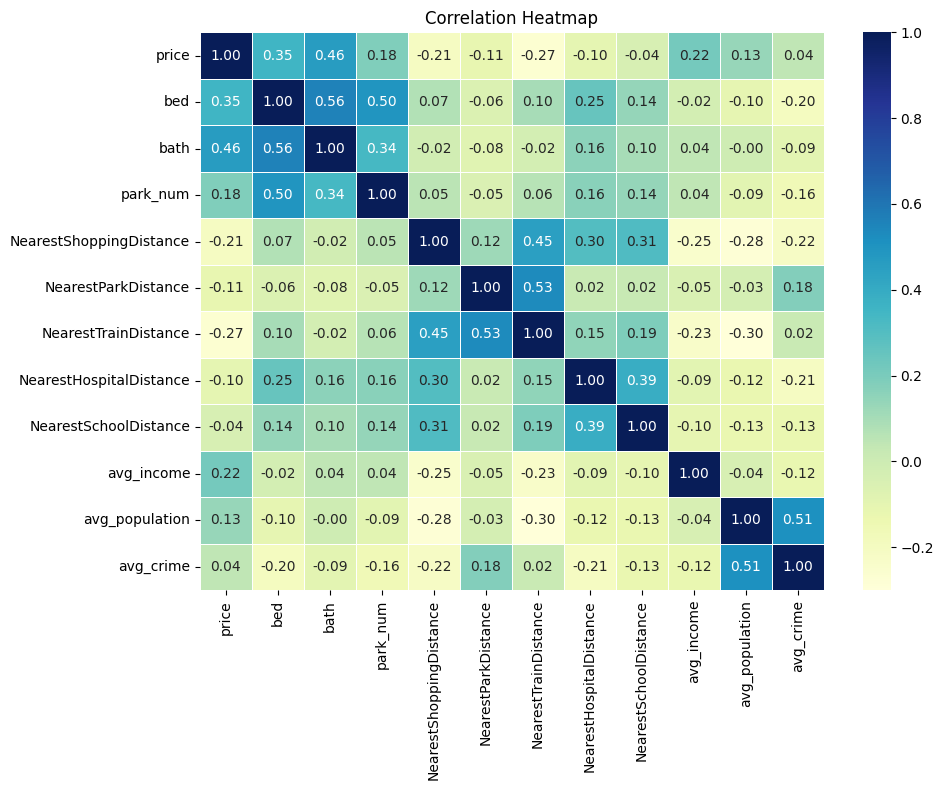

In [9]:
# Create a heatmap with values rounded to two decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(selected_merged_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)

plt.title('Correlation Heatmap')

# Adjust the layout to ensure the entire plot is saved
plt.tight_layout()

# Save the plot
plt.savefig('../plots/correlation_heatmap.png')

# Display the plot
plt.show()

### ANOVA Table

In [10]:
merged_df['School'] = np.where(merged_df['NearestSchoolDistance'] > 2, 'no', 'yes')
merged_df['Shop'] = np.where(merged_df['NearestShoppingDistance'] > 4, 'no', 'yes')
merged_df['Train'] = np.where(merged_df['NearestTrainDistance'] > 5, 'no', 'yes')
merged_df['Hosptial'] = np.where(merged_df['NearestHospitalDistance'] > 2, 'no', 'yes')
merged_df['Park'] = np.where(merged_df['NearestParkDistance'] > 15, 'no', 'yes')

In [11]:
model = ols('price ~ C(School) + C(Shop) + C(Train) + C(Hosptial) + C(Park)', data=merged_df).fit()

# ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table.to_csv('../data/curated/ANOVA_table.csv')

# Save the ANOVA table without the index to a CSV file
anova_table.to_csv('../data/curated/ANOVA_table.csv', index=False)

anova_table

,sum_sq,df,F,PR(>F)
C(School),3.525240e+05,1.0,17.684707,2.632783e-05
C(Shop),8.416363e+05,1.0,42.221496,8.588978e-11
C(Train),9.057965e+06,1.0,454.401552,2.274965e-98
C(Hosptial),3.710159e+04,1.0,1.861237,1.725167e-01
C(Park),7.860205e+04,1.0,3.943148,4.709340e-02
Residual,1.766935e+08,8864.0,NaN,NaN
